# Numerical Exercises 08

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

## Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} 
$$

## Solution

To Evaluate the expectation value of the Hamiltonian, I used the class `BA_integral` with the method `BA_integral::compute` used in the previous numerical exercise. This method computes the integral of a given function taking in input a list of random valued sampled from a reasonable probability distribution using data blocking tecnique. 

To sample the square modulus of the trial wave function, I used the Metropolis algorithm (in lib.h `double* metropolis(args)`) with a uniform transition probability and a reasonable step lenght to fulfill the 50% accept empirical rule. 

I defined three different useful functions:

- ``` double psi_trial(double x, double mu, double sigma);``` representing $\Psi_T^{\sigma,\mu}(x)$

- ``` double psi_trial_abs(double x, double mu, double sigma);``` representing $|\Psi_T^{\sigma,\mu}(x)|^2$

- ``` double H_psi_frac_psi(double x, double mu, double sigma);``` representing $\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$

For the last function i calculated the analytical expression of the Hamiltonian operator applied to the trial wave function

$$\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} + V(x)$$

with

$$

\frac{d^2}{dx^2} \Psi_T^{\sigma,\mu}(x)
=
e^{-\frac{(x+\mu)^2}{2\sigma^2}} \left( \frac{(x+\mu)^2}{\sigma^4} - \frac{1}{\sigma^2} \right)
+
e^{-\frac{(x-\mu)^2}{2\sigma^2}} \left( \frac{(x-\mu)^2}{\sigma^4} - \frac{1}{\sigma^2} \right)


$$




Here i report the evaluation of $\langle {\hat H} \rangle_T$ for $\mu = 2$ and $\sigma = 1$.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'

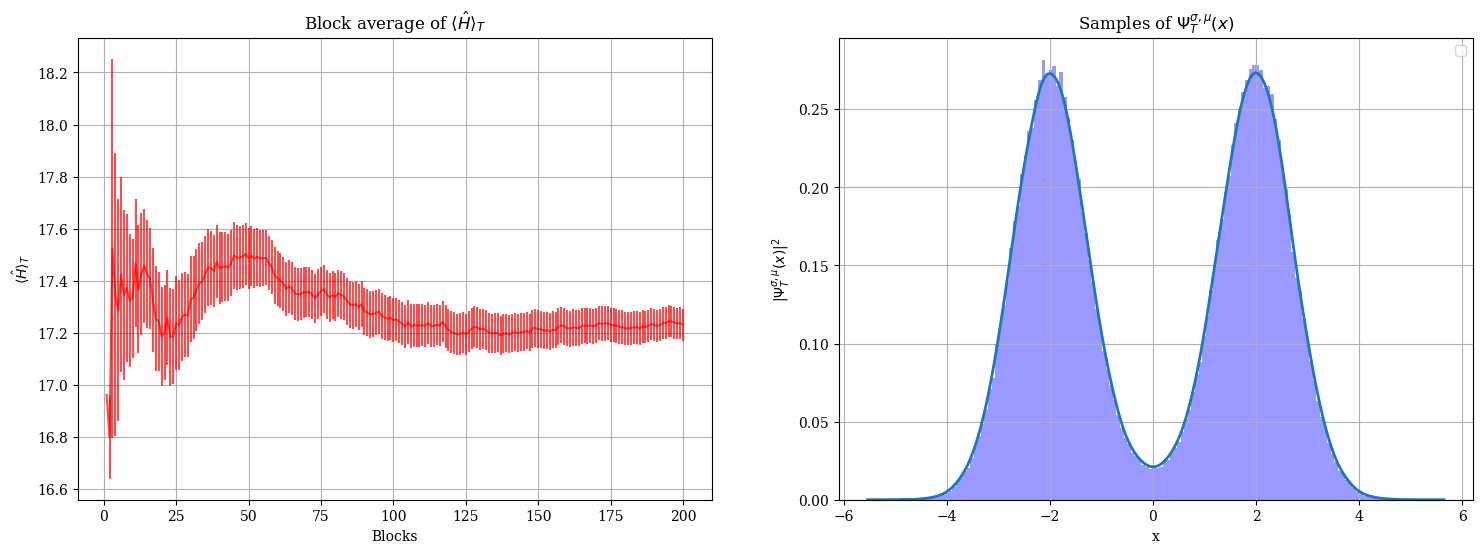

In [2]:
H_mean_sample = pd.read_csv('data/mean_H.dat', sep = ' ')
psi_trial = pd.read_csv('data/sample.dat', sep = ' ', header=None)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].errorbar(H_mean_sample['#Blocks'], H_mean_sample['Estimate'], yerr=H_mean_sample['Error'], color='red', alpha=0.7, label='Mean H')
ax[0].set_xlabel('Blocks')
ax[0].set_ylabel(r'$\langle \hat{H} \rangle_{T}$')
ax[0].grid()
ax[0].set_title(r'Block average of $\langle \hat{H} \rangle_{T}$')
ax[1].hist(psi_trial, bins=150, density=True, color='blue', alpha=0.4)
sns.kdeplot(psi_trial, color='blue', ax=ax[1], lw=2)
ax[1].set_xlabel(r'x')
ax[1].set_ylabel(r'$|\Psi_T^{\sigma,\mu}(x)|^2$')
ax[1].grid()
ax[1].set_title(r'Samples of $\Psi_T^{\sigma,\mu}(x)$')
ax[1].legend()
plt.show()

## Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

## Solution

### Simulated Annealing

The Simulated Annealing algorithm is a probabilistic optimization algorithm used to find an approximate solution to an optimization problem. It is inspired by thermodynamics, specifically by the way that liquids freeze and crystallize, or metals cool and anneal. If the material is cooled slowly, the atoms have time to arrange themselves in a low-energy state (we are interested in the lowest-energy state).

The idea is to interpret the cost function $L(x)$, with $x \in \mathbb{X}^n$, as the energy of a statistical mechanics system and to consider the Boltzmann distribution:

$$
p(x) = \frac{\exp[-\beta L(x)]}{Z}
$$

We start from an initial point $(\mu_0, \sigma_0)$ in the parameter space and we randomly move using a Markov process. We then evaluate $\langle H \rangle$ with the new configuration, and we accept the new configuration with an acceptance probability:

$$
P_{\text{acc}} = \min\left(1, e^{-\beta \left(L(x_{\text{new}}) - L(x_{\text{old}})\right)}\right)
$$

We then lower the temperature until a minimum value of $T$ is reached.

### Code

In a `for` loop, I update the temperature and the parameters $\mu$ and $\sigma$ by performing a Gaussian step in the parameter space. The step size is proportional to the current temperature.

At each iteration, the inverse temperature is updated as $\beta = i + 1$, so that the temperature decreases as $T = 1 / \beta$.

Before making the step, the increments `d_mu` and `d_sigma` are adjusted to ensure they are not larger than the previous values of $\mu$ and $\sigma$, respectively. If they are larger, they are set to default values: `delta_mu = 0.5` and `delta_sigma = 0.5`.

The parameters are then updated using a Gaussian-distributed step, scaled by the temperature ratio $T/T_0$, and the absolute value is taken to ensure positivity:

```cpp
for (int i = 0; i < SA_steps; i++){
    // New lower temperature
    beta = i + 1;
    T = 1. / beta;

    // Mu and sigma steps must be smaller than the old ones
    d_mu = d_mu > mu_old ? mu_old : delta_mu;
    d_sigma = d_sigma > sigma_old ? sigma_old : delta_sigma;

    // Gaussian step in parameter space
    mu = fabs(mu_old + rnd.Gauss(0., d_mu * T / T0));
    sigma = fabs(sigma_old + rnd.Gauss(0., d_sigma * T / T0));

    /* ... */
}
```

I evaluate with `BA_integral::compute` the expectation value of the Hamiltonian sampling the square modulus of the trial wave function with the Metropolis algorithm. Then I compute the acceptance probability and update the parameters accordingly:

```cpp
/* ... */

p_accept = min(1., exp(-beta*(H_new - H_old)));
        if (rnd.Rannyu() < p_accept){
            mu_old = mu;
            sigma_old = sigma;
            if(H_new < H_best){
                H_old = H_new;
                H_best = H_new;
                H_err_best = H_err;
                mu_best = mu;
                sigma_best = sigma;
            }
        } else {
            mu = mu_old;
            sigma = sigma_old;
        }

/* ... */
```



### Results 

Now I will show the results of the variational optimization of the ground state energy of the system.

Best parameters found (mu, sigma):  [0.796331 0.598251]


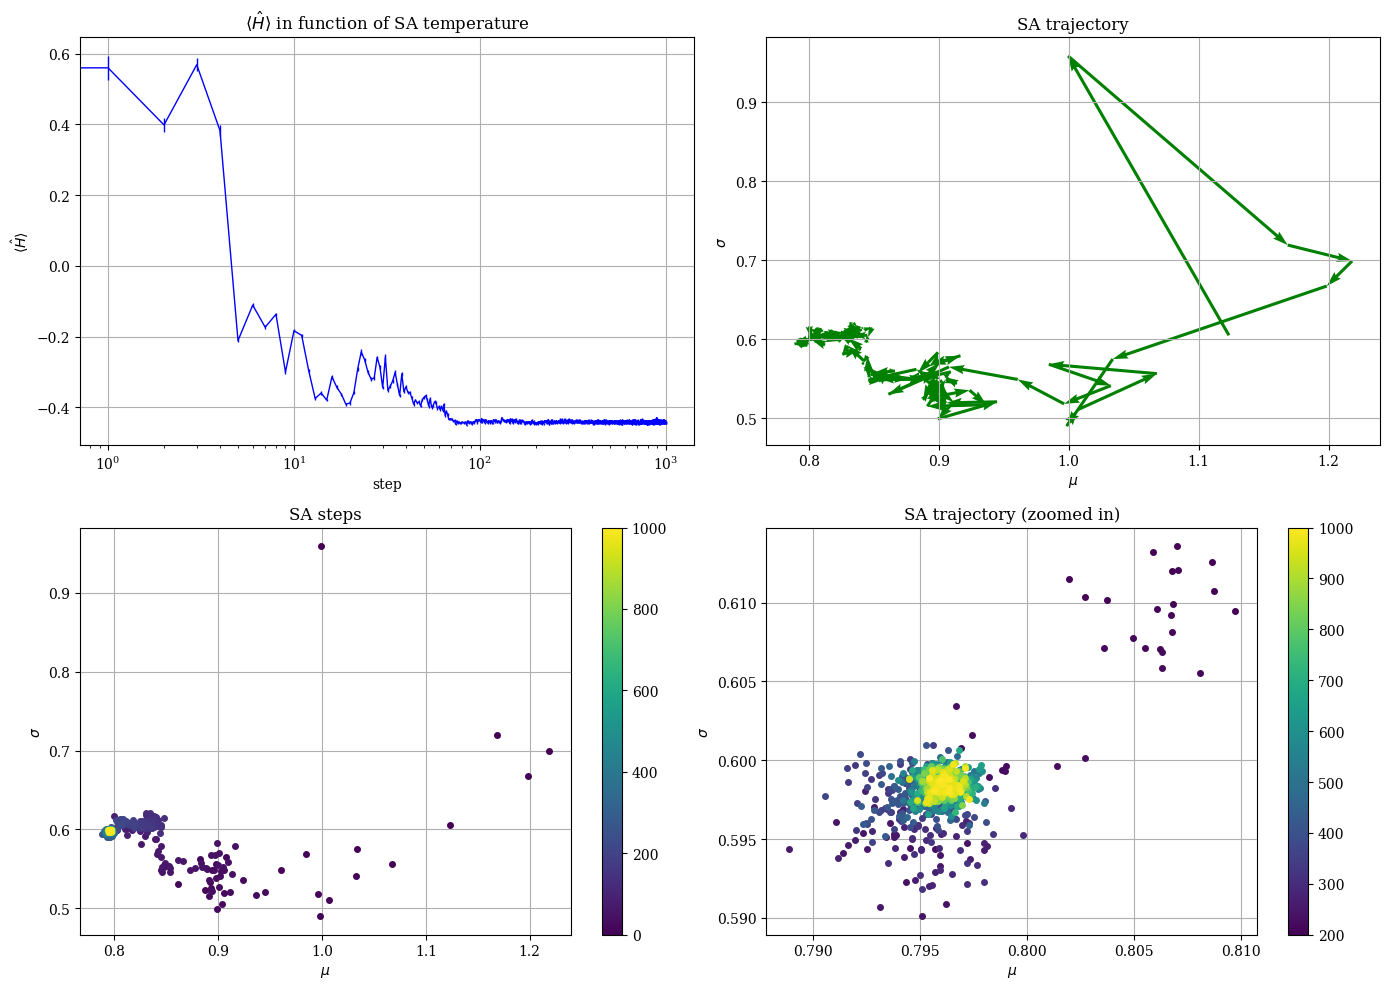

In [6]:
mu_sigma_df = pd.read_csv('data/mu_sigma.dat', delim_whitespace=True)
H_sa = pd.read_csv('data/T_vs_H.dat', delim_whitespace=True)
print('Best parameters found (mu, sigma): ', mu_sigma_df.iloc[-1][['mu', 'sigma']].values)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0,0].errorbar(H_sa['step'], H_sa['H'], yerr = H_sa['err'], color='blue', label='H', lw=1)
axs[0,0].set_xscale('log')
axs[0,0].set_xlabel('step')
axs[0,0].set_ylabel(r'$\langle \hat{H} \rangle$')
axs[0,0].set_title(r'$\langle \hat{H} \rangle$ in function of SA temperature')
axs[0,0].grid()

mus = mu_sigma_df['mu'].values
sigmas = mu_sigma_df['sigma'].values
dmu = np.diff(mus)
dsigma = np.diff(sigmas)
colors = plt.cm.viridis(np.linspace(0, 1, len(mu_sigma_df)))
for i in range(len(mu_sigma_df)):
    axs[1,0].plot(mu_sigma_df['mu'][i], mu_sigma_df['sigma'][i], 'o', ls = '-', color=colors[i], markersize=4)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=len(mu_sigma_df)))
sm.set_array([])
fig.colorbar(sm, ax=axs[1,0])
axs[1,0].set_xlabel(r'$\mu$')
axs[1,0].set_ylabel(r'$\sigma$')
axs[1,0].grid()
axs[1,0].set_title('SA steps')

colors = plt.cm.viridis(np.linspace(0, 1, len(mu_sigma_df) - 200))
for idx, i in enumerate(range(200, len(mu_sigma_df))):
    axs[1,1].plot(mu_sigma_df['mu'][i], mu_sigma_df['sigma'][i], 'o', ls = '-', color=colors[idx], markersize=4)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=200, vmax=len(mu_sigma_df)))
sm.set_array([])
fig.colorbar(sm, ax=axs[1,1])
axs[0,1].grid()
axs[0,1].quiver(mus[:-1], sigmas[:-1], dmu, dsigma, angles='xy', scale_units='xy', scale=1, width=0.005, color='green')
axs[0,1].set_xlabel(r'$\mu$')
axs[0,1].set_ylabel(r'$\sigma$')
axs[0,1].set_title('SA trajectory')
axs[1,1].set_xlabel(r'$\mu$')
axs[1,1].set_ylabel(r'$\sigma$')
axs[1,1].grid()
axs[1,1].set_title('SA trajectory (zoomed in)')
plt.tight_layout()
plt.show()


From these plots, we observe that the trajectory of the Simulated Annealing stabilizes around a minimum (hopefully the global one) after approximately one hundred steps. This behavior is due both to an initial guess for $\sigma$ and $\mu$ that is not too far from the minimum, and to the choice of a step size that adapts to the temperature.


Let's have a look at the results of the optimization process compared to matrix diagonalization solution.

In [4]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

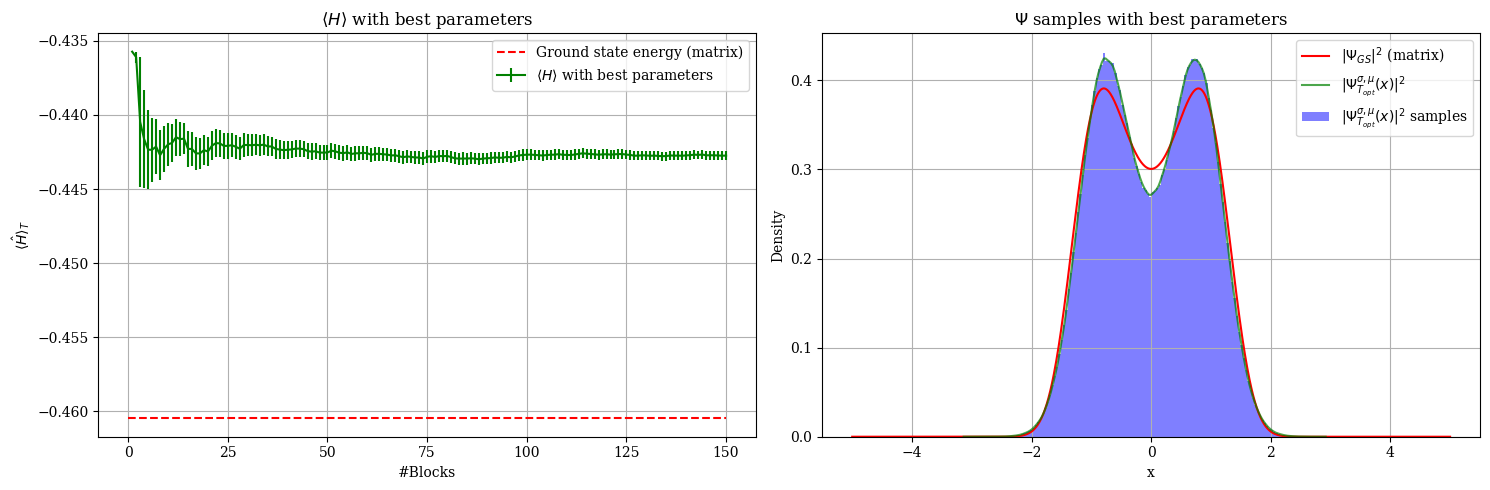

In [5]:
best_H = pd.read_csv('data/mean_H_best.dat', delim_whitespace=True)
psi_best_sample = pd.read_csv('data/psi_best_sample.dat', delim_whitespace=True, header=None)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].errorbar(best_H['#Blocks'], best_H['Estimate'], yerr=best_H['Error'], color='green', label=r'$\langle H \rangle$ with best parameters')
ax[0].hlines(y=E[0], xmin=0, xmax=150, color='red', linestyle='--', label='Ground state energy (matrix)')
ax[0].set_xlabel('#Blocks')
ax[0].set_ylabel(r'$\langle \hat{H} \rangle_{T}$')
ax[0].set_xticks(np.arange(0, 151, 25))
ax[0].grid()
ax[0].legend()
ax[0].set_title(r'$\langle H \rangle$ with best parameters')

ax[1].plot(x, (psi[0])**2, color='red', label=r'$|\Psi_{GS}|^2$ (matrix)')
sns.kdeplot(psi_best_sample[0], color='green', label=r'$|\Psi_{T_{opt}}^{\sigma,\mu}(x)|^2$', alpha=0.7, ax=ax[1])
ax[1].hist(psi_best_sample[0], bins=150, density=True, color='blue', alpha=0.5, label=r'$|\Psi_{T_{opt}}^{\sigma,\mu}(x)|^2$ samples')
ax[1].set_xlabel('x')
ax[1].legend()
ax[1].grid()
ax[1].set_title(r'$\Psi$ samples with best parameters')

plt.tight_layout()
plt.show()

We observe that the SA algorithm converges to a value slightly different from the one obtained with the matrix diagonalization method. Observing the wavefunction plot, we can see that the shape of the wavefunction is very similar to the one obtained with the matrix diagonalization method, but it is not exactly the same especially near the origin.

However, we are often interested in even an approximate solution, we can therefore be satisfied given the little difference between the energy values.